In [12]:
#Import Packages
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from adjustText import adjust_text
import matplotlib.font_manager as fm

#Read data retrieved from Fbref, Premier League Player's Possession Stats
df = pd.read_csv('PremPoss.csv')

#Reconstructing Header
header = df.iloc[0]
df = df[1:] 
df.columns = header

#Taking the variables that are needed
df = df[['Player','Squad','90s','Touches','Def Pen','Def 3rd', 'Mid 3rd', 'Att 3rd', 'Att Pen','Live']]

#Changing variable types to float for easy calculations
df = df.astype({"90s": float, 'Touches' : float, "Def Pen": float, 'Def 3rd' : float, "Mid 3rd": float, 
                'Att 3rd' : float, 'Att Pen': float, 'Live' : float})

#Clean player column
df['Player'] = df['Player'].str.split('\\',expand=True)[0]

#Position Classifier according to Transfermrkt
df2 = pd.read_csv('Positions.csv')
df2 = df2.drop_duplicates()

#Merge to obtain accurate position of player
Player = pd.merge(df, df2, on="Player")

#Filer for Centre-Backs who's played min 10 90s
Player = Player[(Player['Position']=='Centre-Back') & (Player['90s'] >= 10)].reset_index(drop=True)

Player.rename(columns = {'Touches':'Total Touches', 'Def Pen':'Def Pen Touches',
                         'Def 3rd':'Def 3rd Touches', 'Mid 3rd':'Mid 3rd Touches',
                         'Att 3rd':'Att 3rd Touches', 'Att Pen':'Att Pen Touches',
                         'Live':'Live Touches'},inplace = True)

In [13]:
#Read data retrieved from Fbref, Premier League Squad's Possession Stats
Squad = pd.read_csv('PremTeamPoss.csv')

#Reconstructing Header
header = Squad.iloc[0]
Squad = Squad[1:]
Squad.columns = header

#Taking the variables that are needed
Squad = Squad[['Squad','Touches','Def Pen','Def 3rd', 'Mid 3rd', 'Att 3rd', 'Att Pen','Live']]

#Changing variable types to float for easy calculations
Squad = Squad.astype({'Touches' : float, "Def Pen": float, 'Def 3rd' : float, "Mid 3rd": float, 
                'Att 3rd' : float, 'Att Pen': float, 'Live' : float})

#Renaming Column Names
Squad.rename(columns = {'Touches':'Squad Total Touches', 'Def Pen':'Squad Def Pen Touches',
                        'Def 3rd':'Squad Def 3rd Touches', 'Mid 3rd':'Squad Mid 3rd Touches',
                        'Att 3rd':'Squad Att 3rd Touches', 'Att Pen':'Squad Att Pen Touches',
                        'Live':'Squad Live Touches'},inplace = True)

#Merge to obtain final dataframe
df4 = pd.merge(Player, Squad, on="Squad")
df4 = df4.drop(['Position'], axis = 1)
df4.head()

,Player,Squad,90s,Total Touches,Def Pen Touches,Def 3rd Touches,Mid 3rd Touches,Att 3rd Touches,Att Pen Touches,Live Touches,Squad Total Touches,Squad Def Pen Touches,Squad Def 3rd Touches,Squad Mid 3rd Touches,Squad Att 3rd Touches,Squad Att Pen Touches,Squad Live Touches
0,Kristoffer Ajer,Brentford,12.3,50.2,6.42,23.4,22.1,7.40,1.38,43.5,530.0,79.5,212.5,223.3,119.8,20.6,485.0
1,Pontus Jansson,Brentford,25.9,50.4,11.90,32.8,18.2,1.47,1.08,48.7,530.0,79.5,212.5,223.3,119.8,20.6,485.0
2,Ethan Pinnock,Brentford,23.7,66.1,9.66,34.5,26.1,8.06,2.11,57.4,530.0,79.5,212.5,223.3,119.8,20.6,485.0
3,Daniel Amartey,Leicester City,11.7,66.7,11.20,38.3,30.3,1.37,0.00,65.7,606.7,82.3,235.4,276.9,125.6,21.5,560.0
4,Joachim Andersen,Crystal Palace,19.4,76.8,16.40,47.2,31.8,2.37,0.82,74.4,622.0,78.5,230.1,283.2,144.6,22.5,572.9


In [14]:
#Remove warning
pd.options.mode.chained_assignment = None

#Taking the variables that are needed
Result = df4[['Player','Squad','Mid 3rd Touches','Def 3rd Touches', 'Squad Mid 3rd Touches','Squad Def 3rd Touches']]

#New Columns
Result['Touches'] = Result['Mid 3rd Touches'] + Result['Def 3rd Touches']
Result["Squad's Touches"] = Result['Squad Mid 3rd Touches'] + Result['Squad Def 3rd Touches']
Result['Involvement in Build-up (%)'] =round((Result['Touches'] / Result["Squad's Touches"])*100,2) 

#Final Df for easy vieweing
Finaldf = Result[['Player','Squad','Touches',"Squad's Touches",
                 'Involvement in Build-up (%)']].sort_values('Involvement in Build-up (%)',ascending = False).reset_index(drop = True)

Finaldf.head()

,Player,Squad,Touches,Squad's Touches,Involvement in Build-up (%)
0,Thiago Silva,Chelsea,92.9,558.8,16.62
1,Aymeric Laporte,Manchester City,97.6,594.5,16.42
2,Adam Webster,Brighton,86.7,532.1,16.29
3,Lewis Dunk,Brighton,84.0,532.1,15.79
4,Rúben Dias,Manchester City,91.9,594.5,15.46


In [24]:
#Setting up quartiles
q1_Involvement = Finaldf['Involvement in Build-up (%)'].quantile(0.2)
q2_Involvement = Finaldf['Involvement in Build-up (%)'].quantile(0.5)
q3_Involvement = Finaldf['Involvement in Build-up (%)'].quantile(0.9)

q1_Touches = Finaldf['Touches'].quantile(0.2)
q2_Touches = Finaldf['Touches'].quantile(0.5)
q3_Touches = Finaldf['Touches'].quantile(0.9)

#Setting styles
text_color = 'white'
mpl.rcParams['font.weight']='bold'
mpl.rcParams['xtick.color']=text_color
mpl.rcParams['ytick.color']=text_color
mpl.rcParams['text.color']=text_color
mpl.rcParams['legend.fontsize'] = 15
mpl.rcParams['xtick.labelsize'] = 15
mpl.rcParams['ytick.labelsize'] = 15
mpl.rcParams['figure.dpi'] = 300

#Fonts
normal = fm.FontProperties(fname='Rubik-MediumItalic.ttf')
title = fm.FontProperties(fname='Rubik-SemiBoldItalic.ttf')

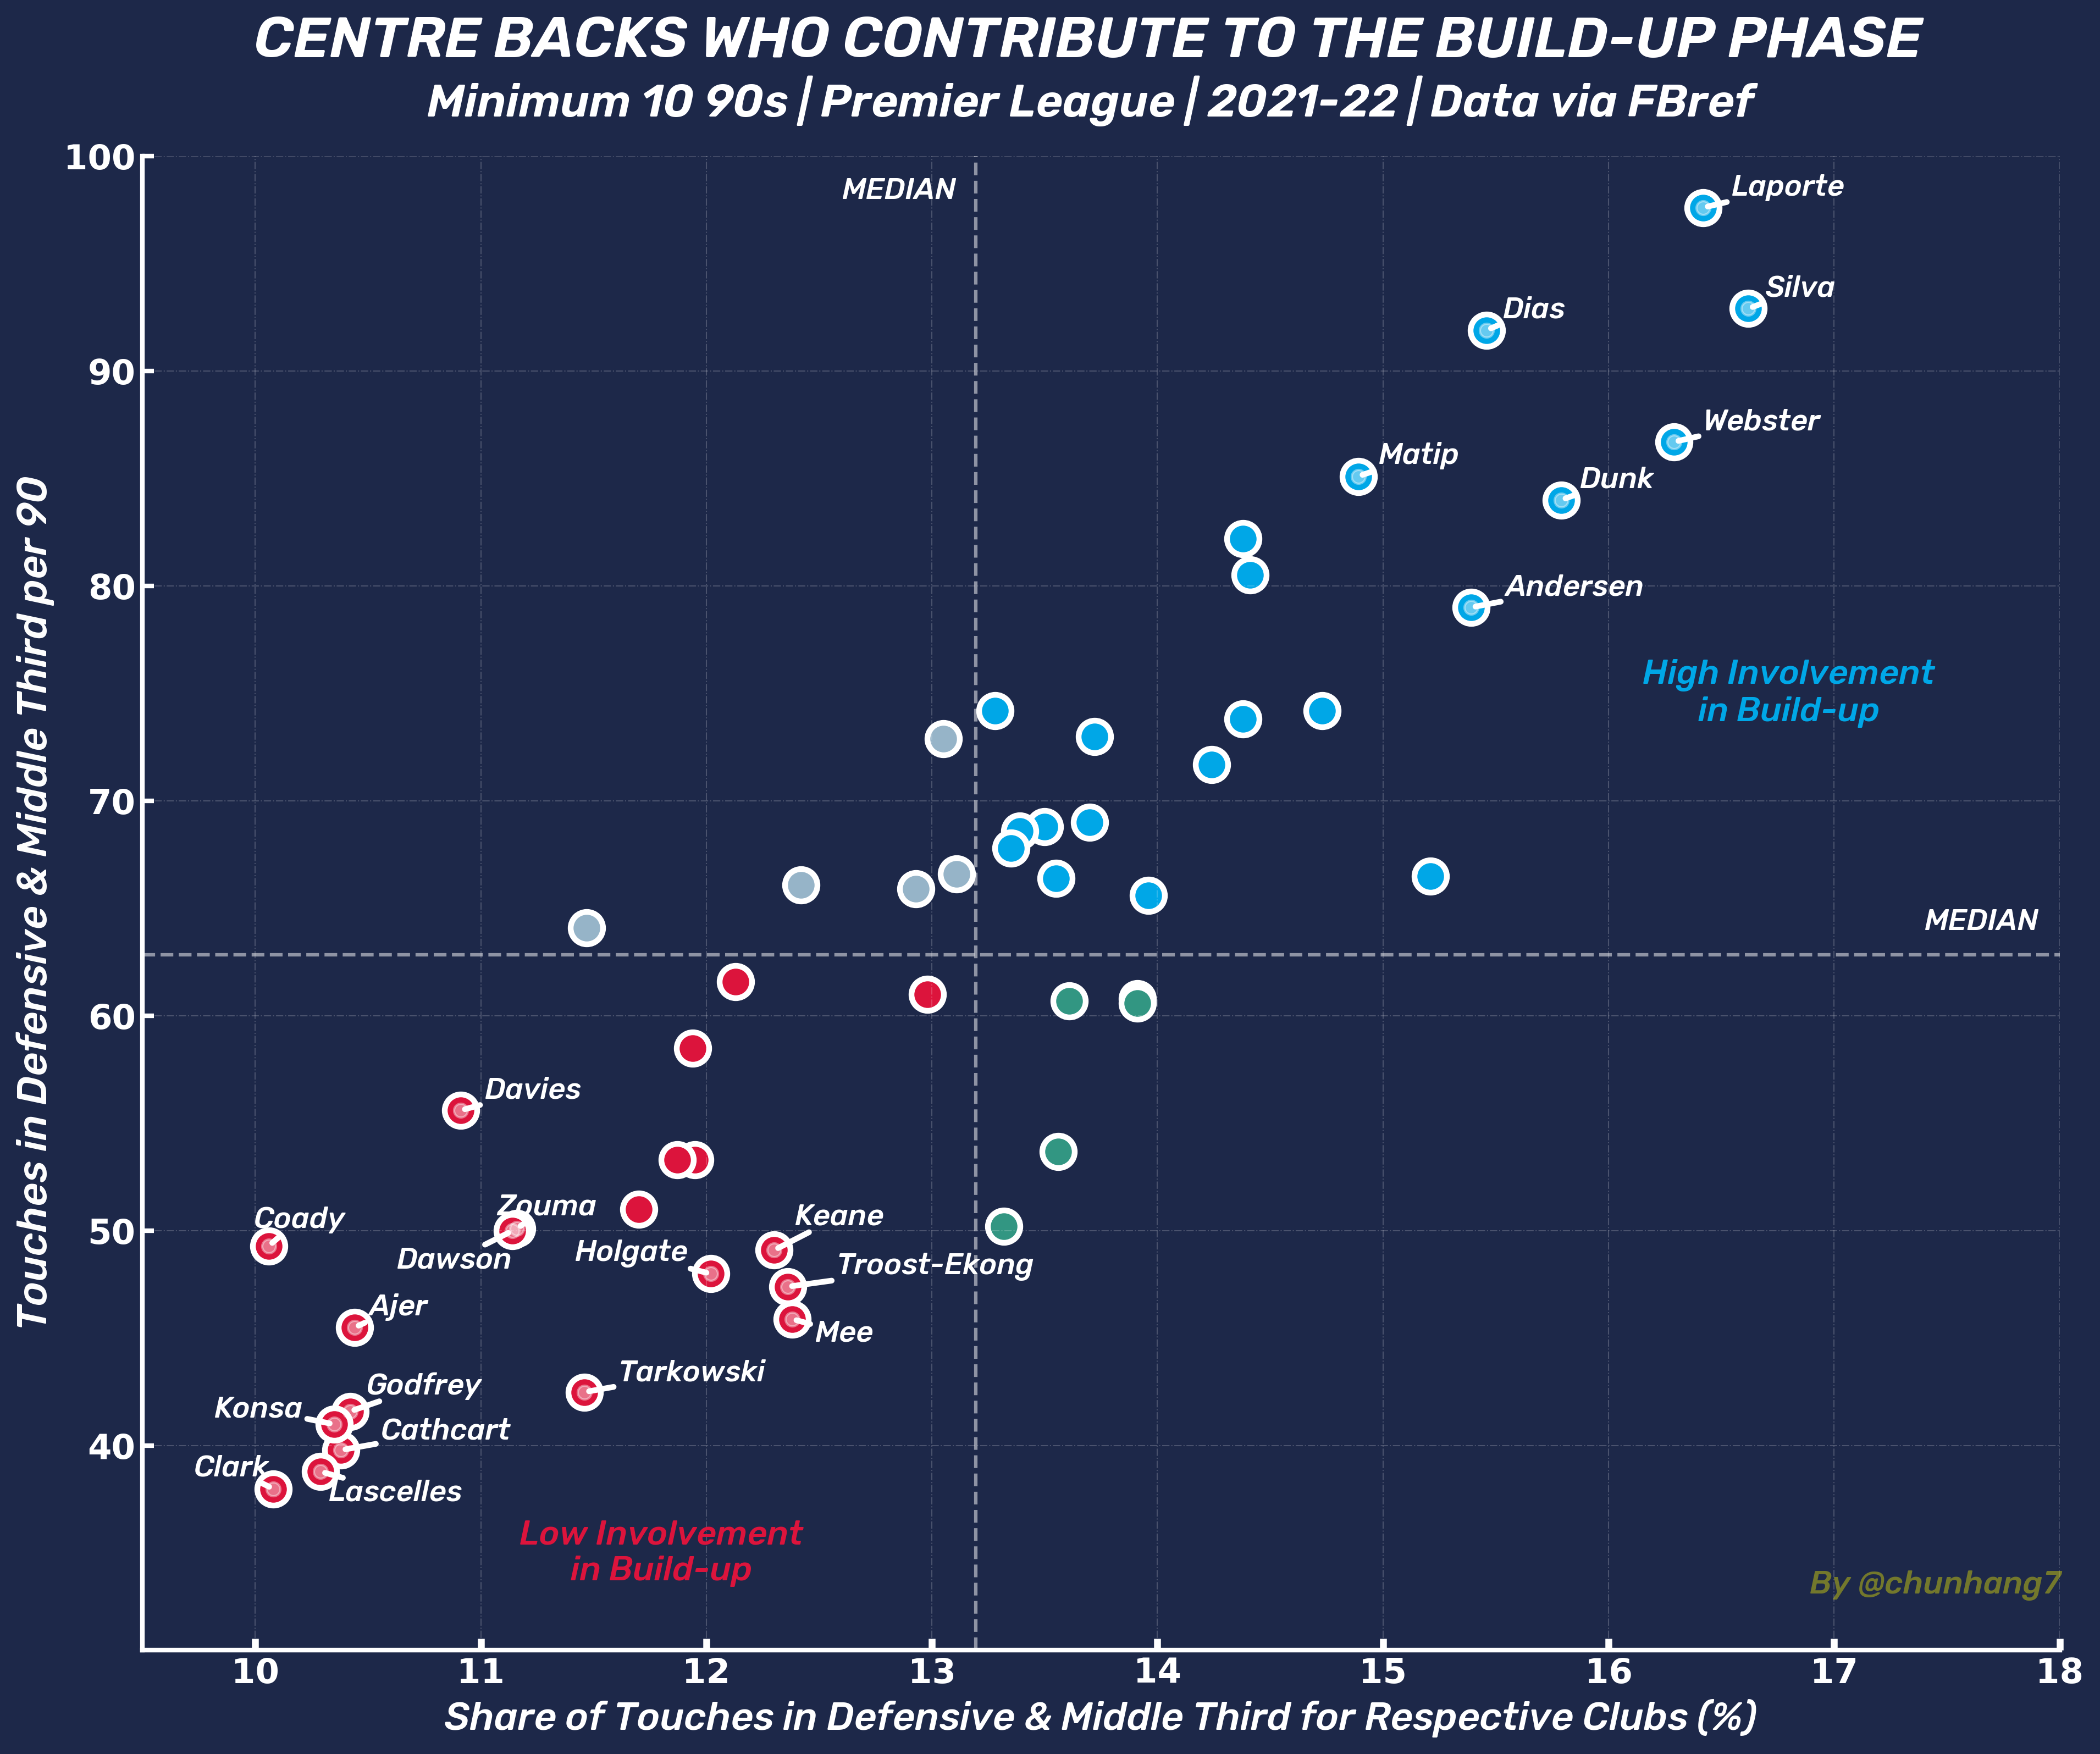

In [25]:
# Figure Size 
fig, ax = plt.subplots(figsize=(15,12))
fig.set_facecolor('#1d2849')

# Grid
ax.grid(color='white', linestyle='-.', linewidth=0.5, alpha=0.2)
ax.axhline(q2_Touches, c='w', alpha=0.5, ls='--')
ax.axvline(q2_Involvement, c='w', alpha=0.5, ls='--')
ax.set_facecolor('#1d2849')

ax.set_xlim(9.5,18)
ax.set_ylim(30.5,100)

#Plotting
#Top right
top_right = Finaldf[(Finaldf['Involvement in Build-up (%)']>q2_Involvement) & (Finaldf['Touches']>q2_Touches)]
x, y = top_right['Involvement in Build-up (%)'].tolist(), top_right['Touches'].tolist()
ax.scatter(x, y, c='#00a7e7',edgecolor='w', lw =2.5, s = 200)
ax.text(16.8,75,'High Involvement\nin Build-up', c='#00a7e7', size=15,va='center',ha='center',fontproperties=normal)

#Top left
top_left = Finaldf[(Finaldf['Involvement in Build-up (%)']<=q2_Involvement) & (Finaldf['Touches']>q2_Touches)]
x, y = top_left['Involvement in Build-up (%)'].tolist(), top_left['Touches'].tolist()
ax.scatter(x, y, c='#96b4c8',edgecolor='w', lw =2.5, s = 200)

#Bottom right
bottom_right = Finaldf[(Finaldf['Involvement in Build-up (%)']>q2_Involvement) & (Finaldf['Touches']<=q2_Touches)]
x, y = bottom_right['Involvement in Build-up (%)'].tolist(), bottom_right['Touches'].tolist()
ax.scatter(x, y, c='#329682',edgecolor='w', lw =2.5, s = 200)

#Bottom left
bottom_left = Finaldf[(Finaldf['Involvement in Build-up (%)']<=q2_Involvement) & (Finaldf['Touches']<=q2_Touches)]
x, y = bottom_left['Involvement in Build-up (%)'].tolist(), bottom_left['Touches'].tolist()
ax.scatter(x, y, c='crimson',edgecolor='w', lw =2.5, s = 200)
ax.text(11.8,35,'Low Involvement\nin Build-up', c='crimson', size=15,va='center',ha='center',fontproperties=normal)

#Setting labels
texts = []
for x, y, s in zip(Finaldf['Involvement in Build-up (%)'], Finaldf['Touches'], Finaldf['Player']):
    if len(s.split())==1:
        name = s
    else:
        name = ' '.join(s.split()[1:])
   
    if x>q3_Involvement or x<q1_Involvement or y>q3_Touches or y<q1_Touches:
        ax.scatter(x, y, c='w', alpha = 0.4)
        texts.append(ax.text(x, y, name, fontdict=dict(color='w', size=13,fontproperties=normal)))
        
adjust_text(texts,force_points=0.2, force_text=0.2,
             expand_points=(1.5,1.5), expand_text=(1.5,1.5),
             arrowprops=dict(arrowstyle = '-', lw=2.5, color='w'))

#Setting Title
fig.text(0.17,0.93,'Centre backs who contribute to the build-up phase'.upper(),size = 25, weight='heavy',fontproperties=title)
fig.text(0.24,0.90,'Minimum 10 90s | Premier League | 2021-22 | Data via FBref', size = 20,fontproperties=title)

#Labels
ax.set_ylabel('Touches in Defensive & Middle Third per 90', size=18, weight='bold',color='w',fontproperties=normal)
ax.set_xlabel('Share of Touches in Defensive & Middle Third for Respective Clubs (%)',
               size=17, weight='bold',color='w',fontproperties=normal)

ax.text(17.4,64,'MEDIAN', size=13, fontproperties=normal)
ax.text(12.6,98,'MEDIAN', size=13, fontproperties=normal)

# Remove axes spines
for s in ['right','top']:
    ax.spines[s].set_visible(False)

#Set spine width & color
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')

# Remove x,y Ticks
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=3, width=3,length=5,direction='in')
ax.yaxis.set_tick_params(pad=3, width=2,length=5,direction='in')

#Watermark
fig.text(0.9, 0.15, "By @chunhang7", fontsize=14, color='#f5f201',ha='right', va='bottom', 
         alpha=0.4, fontweight='bold', fontproperties=normal);